## Introduction

Air pollution will endanger human health and life in big cities, especially to the elderly and children. This is not an individual  problem of one person but a global problem. Therefore, many countries  in the world made air pollution monitoring and control stations in many cities to observe air pollutants such as NO2, CO, SO2, PM2.5, and PM10 to alert the citizens about pollution index which exceeds the quality threshold. 

Particulate Matter PM 2.5 is a fine atmospheric pollutant that has a diameter of fewer than 2.5 micrometers. Particulate Matter PM10 is a coarse particulate that is 10  micrometers or less in diameter. Carbon Monoxide CO is a product of combustion of fuel such as coal, wood, or natural gas. Vehicular  emission contributes to the majority of carbon  monoxide  let into  our atmosphere. Nitrogen dioxide or nitrogen oxide expelled from high-temperature combustion: sulfur dioxide SO2 and Sulphur Oxides SO produced by volcanoes and in industrial processes. Petroleum and Coal often contain sulfur compounds, and their combustion generates sulfur dioxide. Air pollution is caused by the presence of poison gases and substances; therefore, it is impacted by the meteorological factors of a particular place, such as temperature, humidity, rain, and wind.

In this project, the regression analysis technique is used to  evaluate the relationship between these factors and **predict** nitrogen oxides NOx based on other parameters; **main objective of the analysis is to focus on prediction.**

## Dataset description

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level, within an Italian city. Data were recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer.


Dataset attribute information:

- Date (DD/MM/YYYY)
- Time (HH.MM.SS)
- True hourly averaged concentration CO in mg/m^3 (reference analyzer)
- PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
- True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
- True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
- PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
- True hourly averaged NOx concentration in ppb (reference analyzer)
- PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
- True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
- PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
- PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
- Temperature in Â°C
- Relative Humidity (%)
- AH Absolute Humidity


This dataset is from the UCI machine learning repository and contains hourly averaged responses from an air quality multi-sensor device that was located in a significantly polluted area at road level in an undisclosed Italian city. This data was collected over the course of approx one year (from March 2004 - February 2005)

*For reference*: https://archive.ics.uci.edu/ml/datasets/Air+Quality#

*Note*: Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. **Missing values are tagged with -200 value.**

In [284]:
# importing dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings, pprint

# Metrics and preprocessing tools
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

# Model selection
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_predict, train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV, ElasticNet

%matplotlib inline

print("All done!")

All done!


## Data cleaning and feature engineering.

In [196]:
# load and read the data
data = pd.read_csv('data/AirQualityUCI.csv', delimiter=";" ,decimal=",")

# drop unecessary columns
data = data.drop(["Unnamed: 15","Unnamed: 16"], axis=1)

df = data.copy() # Keep a copy of original data 

In [197]:
# check data
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [198]:
df.shape # (rows, columns)

(9471, 15)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [200]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [201]:
df.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [202]:
# get the total unique values for each column
dict = {}
for col in list(df.columns):
    dict[col] = df[col].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).T

,unique count
Date,391
Time,24
CO(GT),97
PT08.S1(CO),1042
NMHC(GT),430
C6H6(GT),408
PT08.S2(NMHC),1246
NOx(GT),926
PT08.S3(NOx),1222
NO2(GT),284


## Parse dates


In [203]:
# check for NA values
df.isna().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [204]:
df.Date.dtype

dtype('O')

In [205]:
df.set_index("Date", inplace=True)

In [206]:
df.index = pd.to_datetime(df.index)

In [207]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [208]:
df['Time'] = pd.to_datetime(df['Time'],format= '%H.%M.%S').dt.hour

In [209]:
df.head()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,,
2004-10-03,18.0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-10-03,19.0,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-10-03,20.0,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-10-03,21.0,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-10-03,22.0,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [210]:
# check for missing values on all the columns
df.apply(lambda x : x == -200).sum()

Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

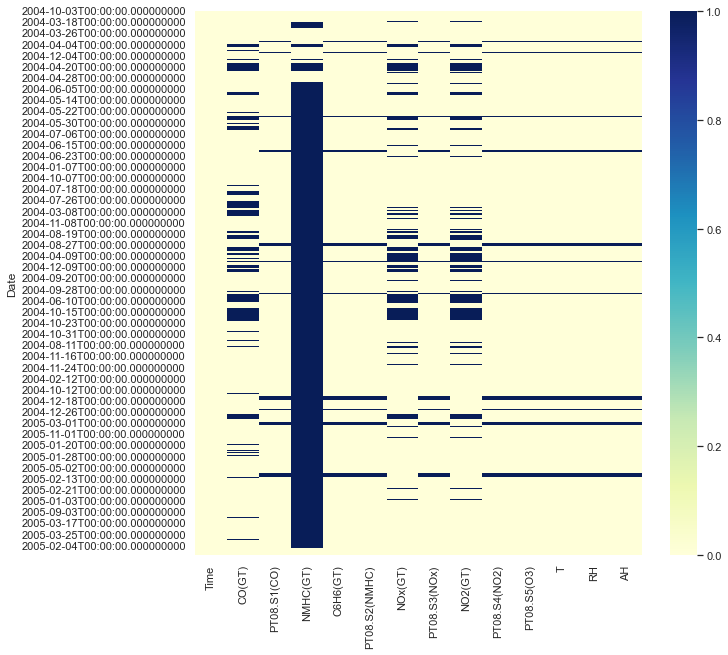

In [211]:
# plot all the columns with values [-200]
fig, ax = plt.subplots(figsize= (10, 10))
ax = sns.heatmap(df.isin([-200]),cmap="YlGnBu")

The NHMC(GT) column is missing many values, more than 85% values are NaN; 8443 out of 9357. Thus this column can be removed from the dataset as these values are very less likely to be of any significant importance in this dataset.

In [212]:
# drop NMHC(GT) column
df.drop('NMHC(GT)', axis=1, inplace=True)

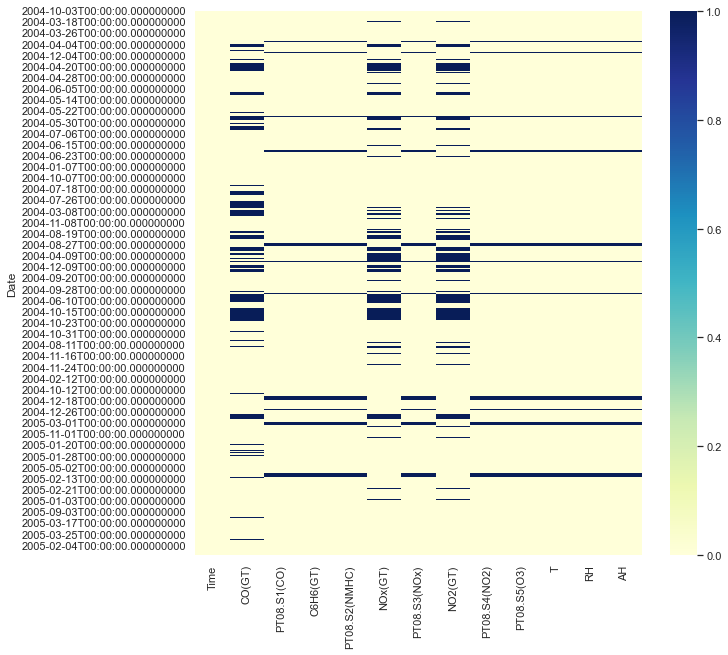

In [213]:
# plot dataframe with NA values after dropping the column above
fig, ax = plt.subplots(figsize= (10, 10))
ax = sns.heatmap(df.isin([-200]),cmap="YlGnBu")

In [214]:
df.replace(to_replace= -200, value= np.NaN, inplace= True)

In [215]:
# Fill NaN values with average of particular date

def remove_outlier(col):
    df[col] = df.groupby('Date')[col].transform(lambda x: x.fillna(x.mean()))

In [216]:
# forward fill method for removing the leftover nan values

df.fillna(method='ffill', inplace= True)

In [217]:
df.isnull().any()

Time             False
CO(GT)           False
PT08.S1(CO)      False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
dtype: bool

## EXPLORATORY DATA ANALYSIS

In [218]:
df.head()

,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,
2004-10-03,18.0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-10-03,19.0,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-10-03,20.0,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-10-03,21.0,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-10-03,22.0,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


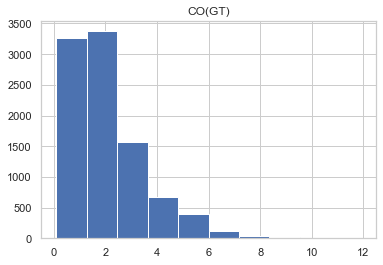

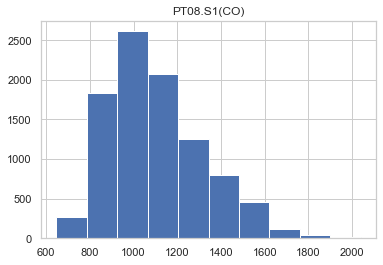

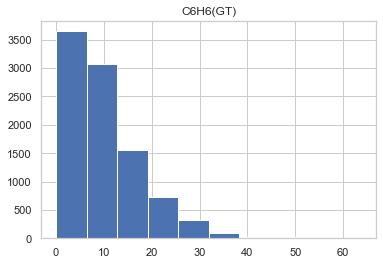

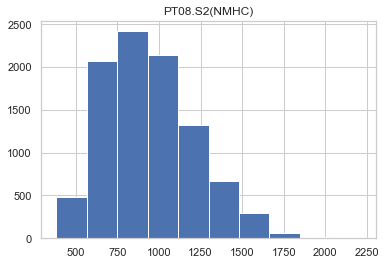

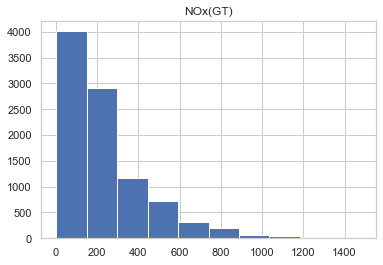

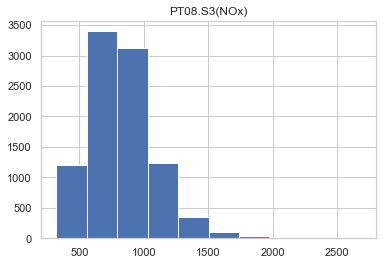

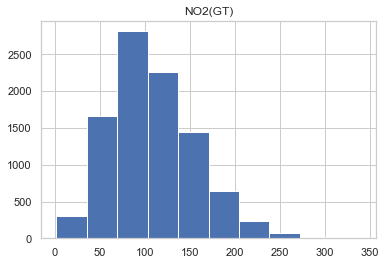

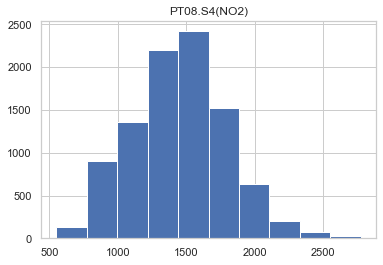

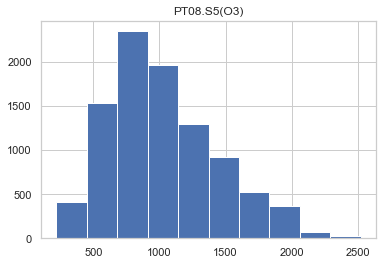

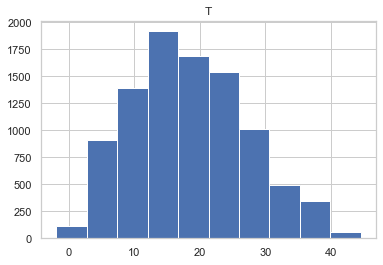

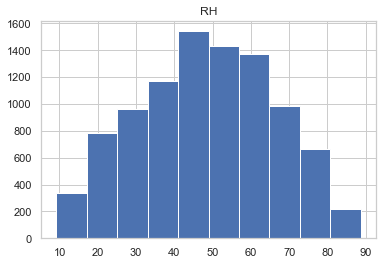

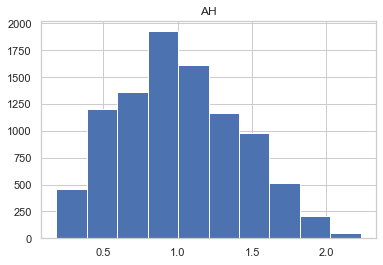

KeyError: 'Unnamed: 15'

In [219]:
# 
for col in columns[1:]:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

(array([1.000e+00, 5.000e+00, 2.700e+01, 2.720e+02, 7.500e+02, 1.671e+03,
        2.552e+03, 2.430e+03, 1.503e+03, 2.600e+02]),
 array([0.69314718, 1.35374461, 2.01434204, 2.67493947, 3.33553689,
        3.99613432, 4.65673175, 5.31732918, 5.97792661, 6.63852403,
        7.29912146]),
 <BarContainer object of 10 artists>)

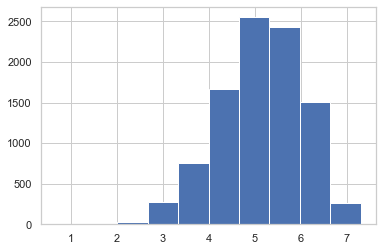

In [220]:
# Log-transform the skewed features
plt.hist(df['NOx(GT)'].apply(lambda x: np.log(x)))

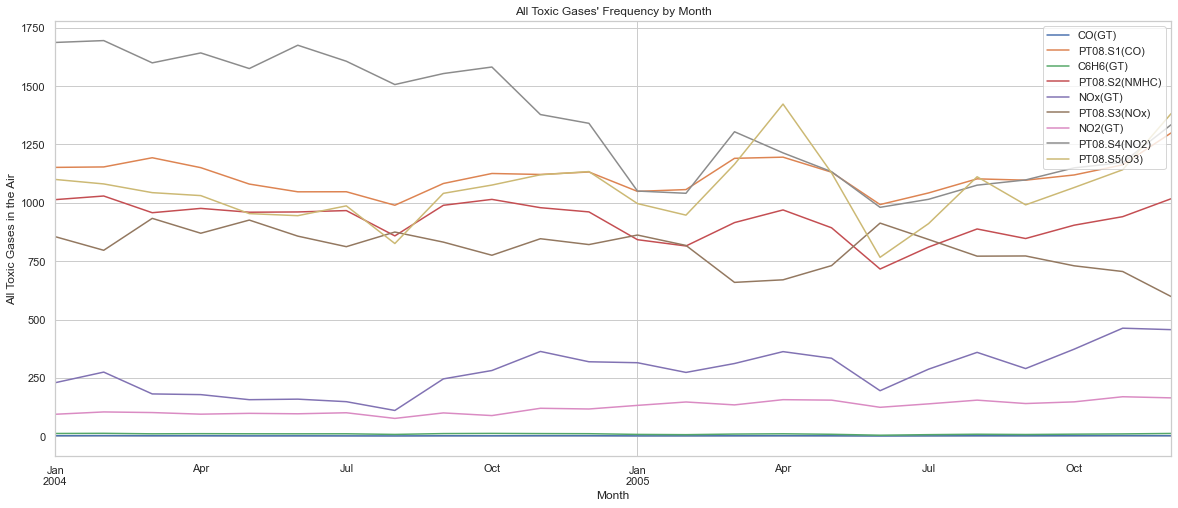

In [222]:
# plot monthly levels of toxic gas
df.drop(['Time','RH','AH','T'], axis=1).resample('M').mean().plot(figsize = (20,8))
plt.legend(loc=1)
plt.xlabel('Month')
plt.ylabel('All Toxic Gases in the Air')
plt.title("All Toxic Gases' Frequency by Month");

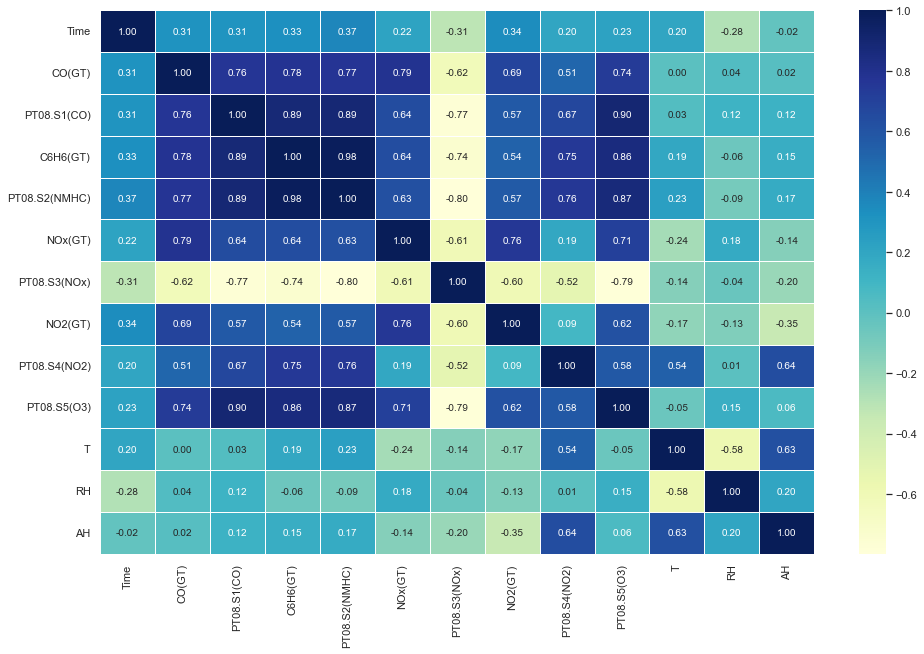

In [227]:
# Make correlation matrix 
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(16, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

In [231]:
df[df.index.duplicated()]

,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,
2004-10-03,19.0,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-10-03,20.0,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-10-03,21.0,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-10-03,22.0,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
2004-10-03,23.0,1.2,1197.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848
...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaT,14.0,2.2,1071.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028
NaT,14.0,2.2,1071.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028
NaT,14.0,2.2,1071.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


Text(0.5, 1.0, 'Mean Total Carbon Monoxides (CO) Level by Month')

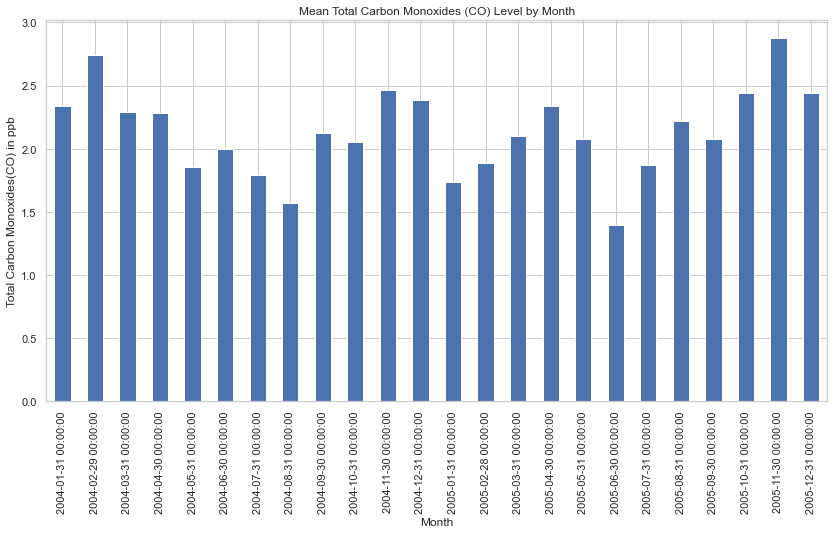

In [225]:
# plot Mean Total Carbon Monoxides (CO) Level by Month
df['CO(GT)'].resample('M').mean().plot(kind='bar', figsize=(14,7))
plt.xlabel('Month')
plt.ylabel('Total Carbon Monoxides(CO) in ppb')   # Parts per billion (ppb)
plt.title("Mean Total Carbon Monoxides (CO) Level by Month")

Text(0.5, 1.0, 'Mean Total Benzene(C6H6) Level by Month')

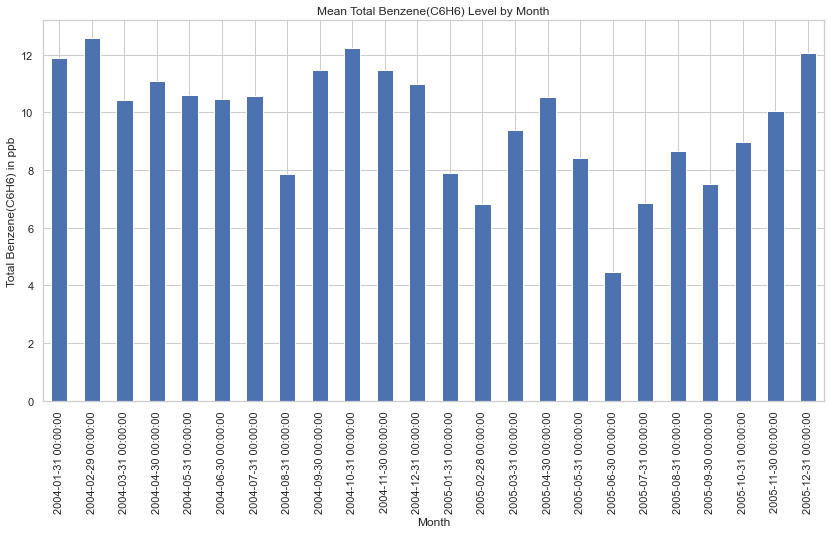

In [226]:
df['C6H6(GT)'].resample('M').mean().plot(kind='bar', figsize=(14,7))
plt.xlabel('Month')
plt.ylabel('Total Benzene(C6H6) in ppb')   # Parts per billion (ppb)
plt.title("Mean Total Benzene(C6H6) Level by Month")

Text(0.5, 1.0, 'Mean Total Nitrogen Oxides(NOx) Level by Month')

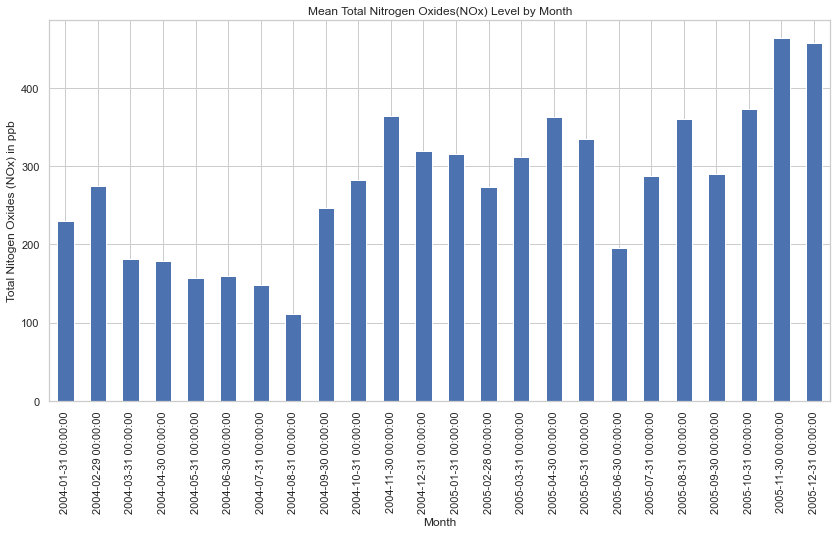

In [237]:
# Mean Total Nitrogen Oxides(NOx) Level by Month
df['NOx(GT)'].resample('M').mean().plot(kind='bar', figsize=(14, 7))
plt.xlabel('Month')
plt.ylabel('Total Nitogen Oxides (NOx) in ppb')   # Parts per billion (ppb)
plt.title("Mean Total Nitrogen Oxides(NOx) Level by Month")

Text(0.5, 1.0, 'Mean Total Nitrogen Oxides(NO2) Level by Month')

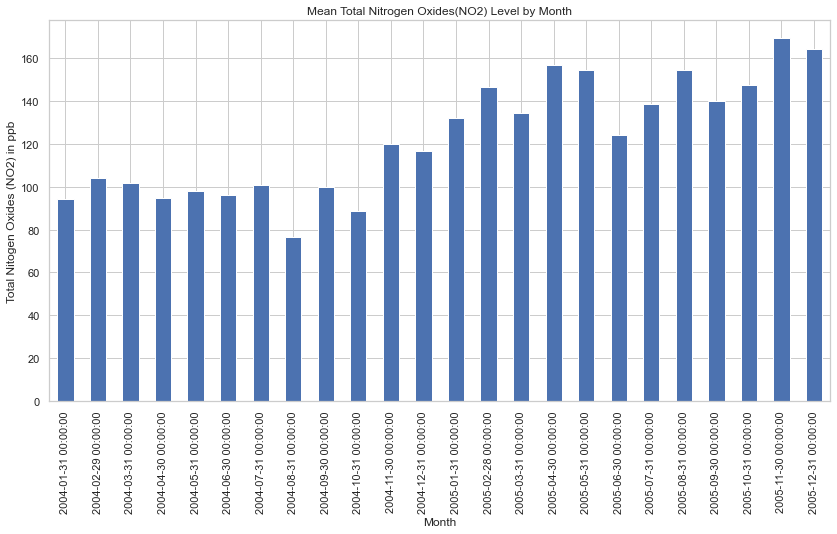

In [238]:
# plot Mean Total Nitrogen Oxides(NO2) Level by Month
df['NO2(GT)'].resample('M').mean().plot(kind='bar', figsize=(14, 7))
plt.xlabel('Month')
plt.ylabel('Total Nitogen Oxides (NO2) in ppb')   # Parts per billion (ppb)
plt.title("Mean Total Nitrogen Oxides(NO2) Level by Month")

Text(0.5, 1.0, 'Mean Total Ozone(O3) Level by Month')

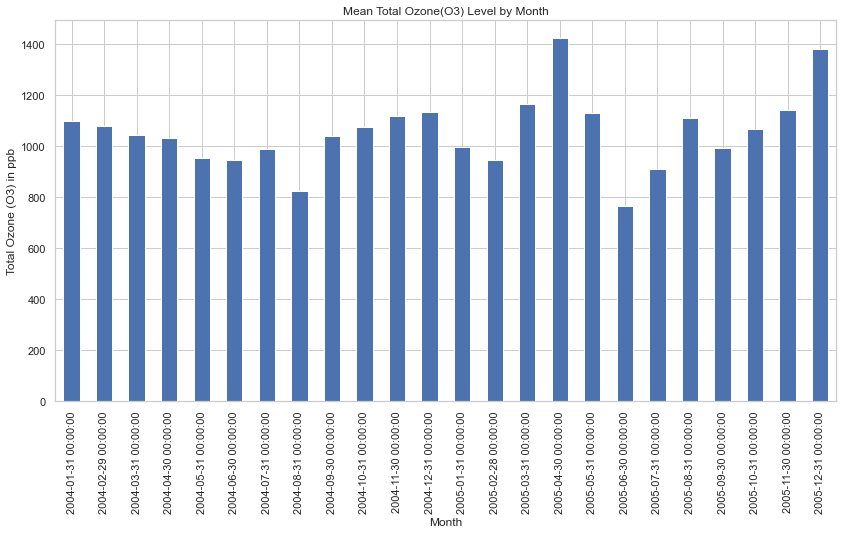

In [240]:
# Mean Total Ozone(O3) Level by Month
df['PT08.S5(O3)'].resample('M').mean().plot(kind='bar', figsize=(14, 7))
plt.xlabel('Month')
plt.ylabel('Total Ozone (O3) in ppb')   # Parts per billion (ppb)
plt.title("Mean Total Ozone(O3) Level by Month")


Text(0.5, 1.0, 'Mean Total Nitrogen Oxides (NOx) Frequency During the day')

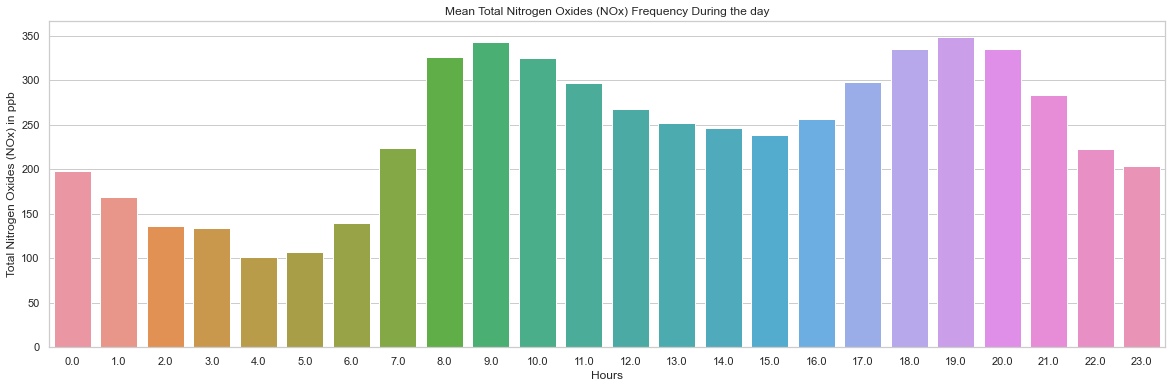

In [241]:
# plot Mean Total Nitrogen Oxides (NOx) Frequency During the day
plt.figure(figsize=(20,6))
sns.barplot(x='Time',y='NOx(GT)',data=df, ci=False)
plt.xlabel('Hours')
plt.ylabel('Total Nitrogen Oxides (NOx) in ppb') # Parts per billion (ppb)
plt.title("Mean Total Nitrogen Oxides (NOx) Frequency During the day")

Text(0.5, 1.0, 'Mean Total Benzene (C6H6) Frequency During the Day')

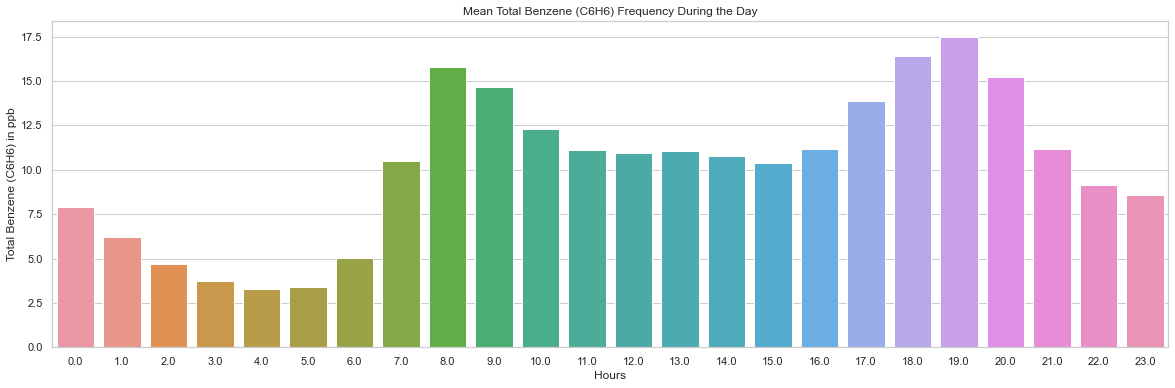

In [242]:
# plot Mean Total Benzene (C6H6) Frequency During the Day
plt.figure(figsize=(20,6))
sns.barplot(x='Time',y='C6H6(GT)',data=df, ci=False)
plt.xlabel('Hours')
plt.ylabel('Total Benzene (C6H6) in ppb') # Parts per billion (ppb)
plt.title("Mean Total Benzene (C6H6) Frequency During the Day")

Text(0.5, 1.0, 'Mean Total Nitrogen Oxides(NO2) Frequency During the day')

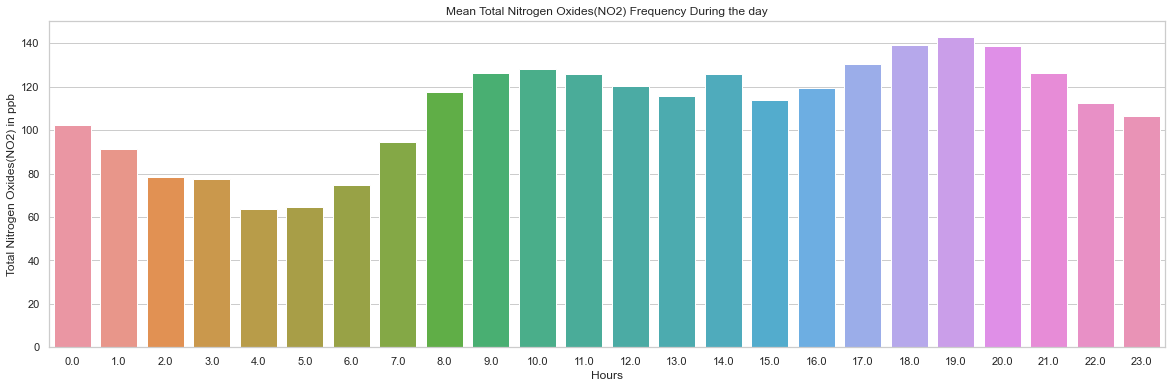

In [243]:
# plot Mean Total Nitrogen Oxides(NO2) Frequency During the day
plt.figure(figsize=(20,6))
sns.barplot(x='Time',y='NO2(GT)',data=df, ci=False)
plt.xlabel('Hours')
plt.ylabel('Total Nitrogen Oxides(NO2) in ppb') # Parts per billion (ppb)
plt.title("Mean Total Nitrogen Oxides(NO2) Frequency During the day")

Text(0.5, 1.0, 'Mean Total Ozone(O3) Frequency During the day')

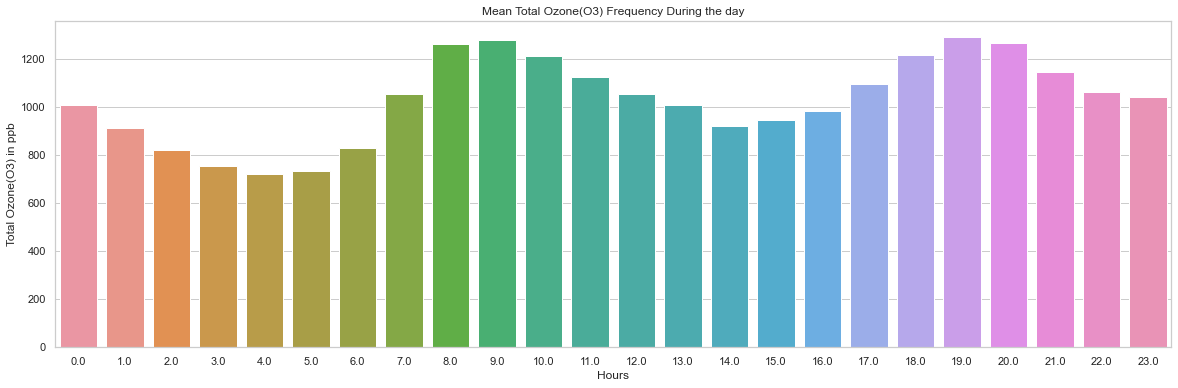

In [245]:
# plot Mean Total Ozone(O3) Frequency During the day
plt.figure(figsize=(20,6))
sns.barplot(x='Time',y='PT08.S5(O3)',data=df, ci=False)
plt.xlabel('Hours')
plt.ylabel('Total Ozone(O3) in ppb') # Parts per billion (ppb)
plt.title("Mean Total Ozone(O3) Frequency During the day")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


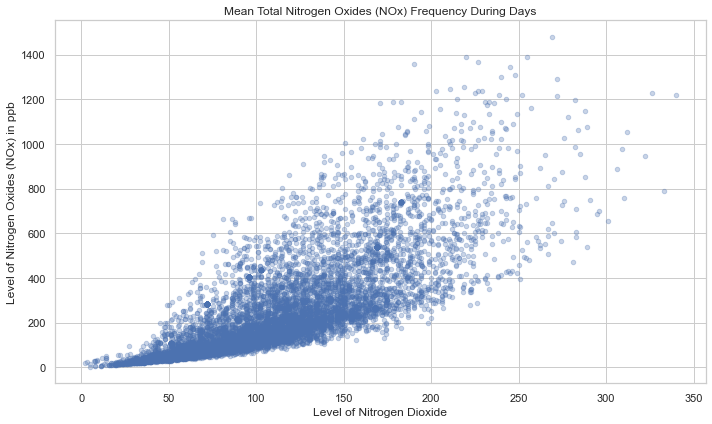

In [246]:
# plot Mean Total Nitrogen Oxides (NOx) Frequency During Days
df.plot(x='NO2(GT)',y='NOx(GT)', kind='scatter', figsize = (10,6), alpha=0.3)
plt.xlabel('Level of Nitrogen Dioxide')
plt.ylabel('Level of Nitrogen Oxides (NOx) in ppb') # Parts per billion (ppb)
plt.title("Mean Total Nitrogen Oxides (NOx) Frequency During Days")
plt.tight_layout();

<AxesSubplot:>

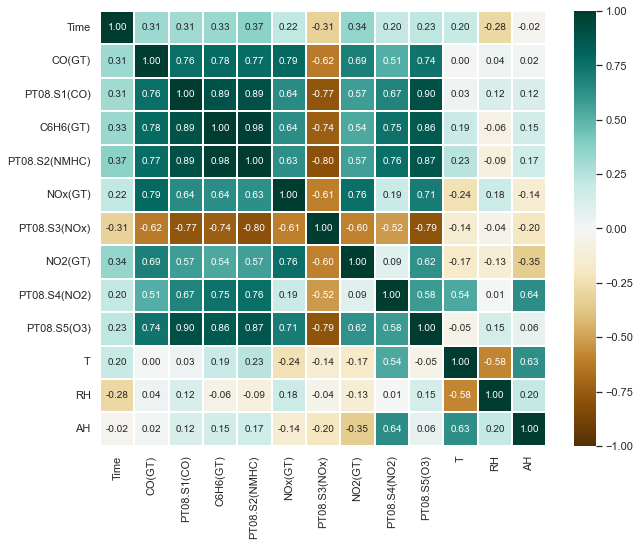

In [247]:
# perform Pearson Correlation matrix
corrPearson = df.corr(method="pearson")


plt.figure(figsize=(10,8))
sns.heatmap(corrPearson, 
            annot=True,
            fmt=".2f",
            linewidth=.20,
            cmap='BrBG',
            vmin=-1, 
            vmax=+1
           )

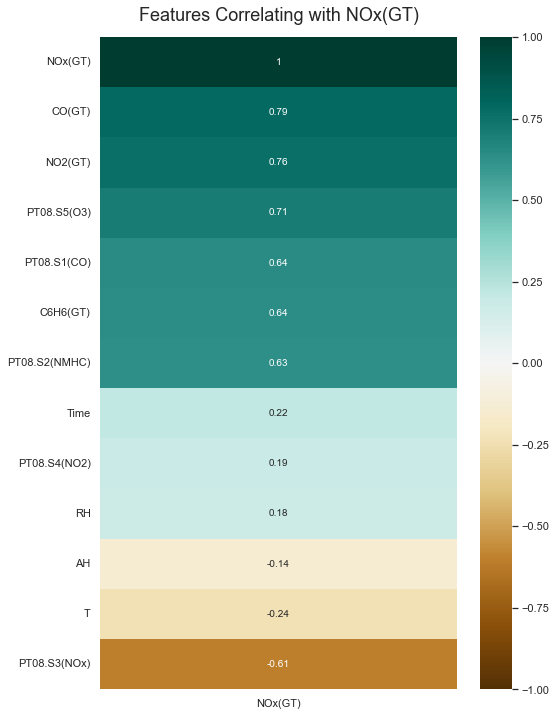

In [248]:
# plot correlation levels of the features to Nox(GT)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(corrPearson[['NOx(GT)']].sort_values(by='NOx(GT)', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with NOx(GT)', fontdict={'fontsize':18}, pad=16);

## Modeling

In [249]:
df.head()

,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,
2004-10-03,18.0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-10-03,19.0,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-10-03,20.0,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-10-03,21.0,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-10-03,22.0,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [250]:
# Split data into x and y
X = df.drop(['NOx(GT)','T','Time'], axis=1)

y = df['NOx(GT)']

In [251]:
# split data into train and test sets
np.random.seed(2424)

# split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [252]:
X = np.log(X)
y = np.log(y)

C:\Users\lucya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


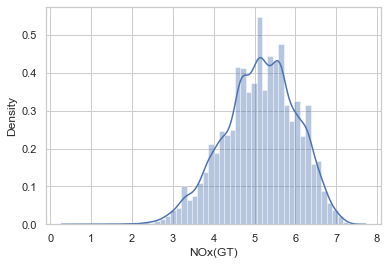

In [253]:
sns.distplot(y);

In [254]:
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 7576 samples.
Testing set has 1895 samples.


Data is splitted, time to build ML model

## Choose Models , fit and score the ML models

Models to load and try:

1. LinearRegression;
2. Lasso;
3. Ridge;
4. Elastic Net;
4. DecisionTree Regressor;
4. Random Forest Regressor.


In [258]:
# Put models in a dictionary
models = {"Linear Regression": LinearRegression(),
          "Lasso": Lasso(),
          "Ridge": Ridge(),
          "Elastic Net": ElasticNet(),
          "DecisionTreeRegressor": DecisionTreeRegressor(),
          "RandomForestRegressor": RandomForestRegressor()
         }

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given ML models.
    models: a dict of diff SKlearn ML models;

    """
    # Set random seed
    np.random.seed(42)
    # Make a dict to keep ML scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [259]:
# score the models
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Linear Regression': 0.8365953641070447,
 'Lasso': 0.8352933933739933,
 'Ridge': 0.8365791201421416,
 'Elastic Net': 0.8068324196196663,
 'DecisionTreeRegressor': 0.8538904032318794,
 'RandomForestRegressor': 0.9338367990363031}

### Model Comparison

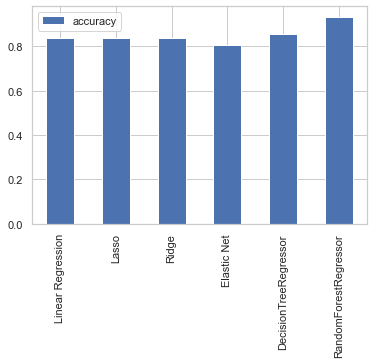

In [261]:
# compare models
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [262]:
# Score the models and get the RMSE score
r2 = []
model = []
RMSE = []
regressor = [LinearRegression(),Ridge(),Lasso(), ElasticNet(), DecisionTreeRegressor(), RandomForestRegressor()]

for obj in regressor:
    model_name = type(obj).__name__
    obj.fit(X_train,y_train)
    predict=obj.predict(X_test)
    r2.append(r2_score(y_test,predict))
    model.append(model_name)
    RMSE.append(mean_squared_error(y_test, predict, squared=False))
    
models = pd.DataFrame({'Model':model, 'r2':r2, 'RMSE':RMSE})
print(models)

                   Model        r2       RMSE
0       LinearRegression  0.836595  82.808501
1                  Ridge  0.836579  82.812616
2                  Lasso  0.835293  83.137746
3             ElasticNet  0.806832  90.034686
4  DecisionTreeRegressor  0.853525  78.401416
5  RandomForestRegressor  0.934268  52.520686


###### Can this scores be improved?
Let's see!

Let's try to do the following to try improve Ridge and Lasso:

Chain multiple data processing steps together using Pipeline
Use the KFolds object to split data into multiple folds.
Hyperparametre tunning;
Perform cross validation using SciKit Learn with cross_val_predict and GridSearchCV

Text(0.5, 1.0, 'RMSE for models')

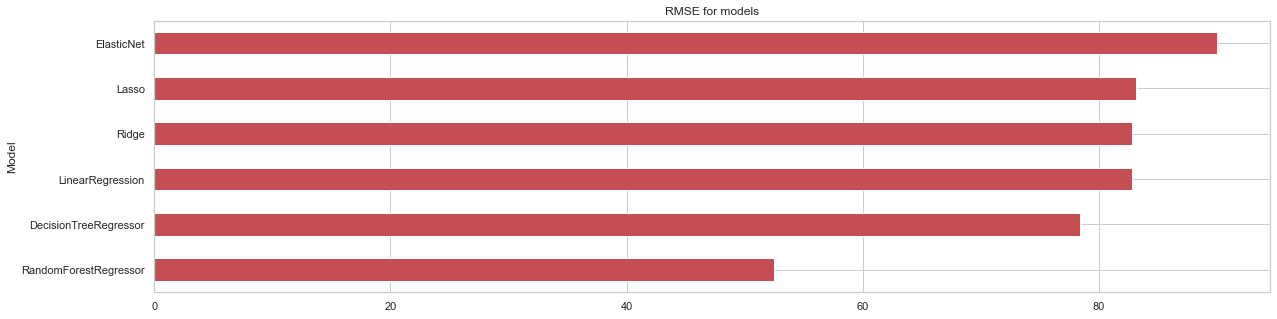

In [263]:
# Plot RMSE scores by model
models = models.set_index('Model')
plt.figure(figsize=(20,5))
models['RMSE'].sort_values().plot(kind='barh', color='r', align='center')
plt.title('RMSE for models')

### This is a baseline model

First predictiong aren't always the best
To try next:
- Hyperparameter tunning;
- Cross validation;
- Data standardization;
- PolynomialFeature;



In [264]:
# Set up KFold split
kf = KFold(shuffle=True, random_state=2425, n_splits=3)

# scale data using StandardScaler and score the linear regression model
s = StandardScaler()
lr = LinearRegression()

# fit the data
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)  
lr.fit(X_train, y_train)

# make predictions 
y_pred = lr.predict(X_test)
score = r2_score(y_test, y_pred)

# create pipeline and score the model
estimator = Pipeline([("scaler", s),("regression", lr)])
predictions_lr = cross_val_predict(estimator, X_train, y_train, cv=kf)
linear_score = r2_score(y_train, predictions_lr)

# show the score
linear_score, score #almost identical

(0.838788750252173, 0.8365953641070447)

The improvment is very small. Let's move forward and try to improve Ridge and Lasso in order to try to beat the score of the RandomForestRegressor

C:\Users\lucya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predictions')

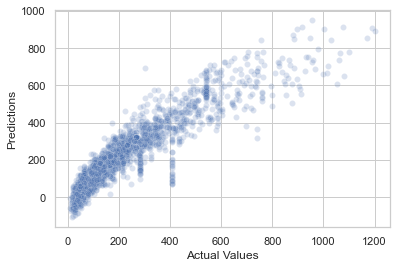

In [270]:
# plot 
sns.scatterplot(y_test, y_pred, alpha = 0.2)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')

C:\Users\lucya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


MAE: 58.740592715054305
MSE: 6857.247755504767
RMSE: 82.80850050269457


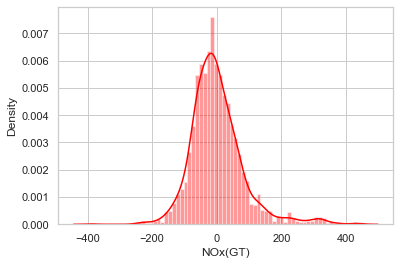

In [271]:
# plot metric scores
sns.distplot((y_test-y_pred), bins=70, color="red")
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

### improve Lasso score

C:\Users\lucya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.081e+04, tolerance: 2.120e+04
  model = cd_fast.enet_coordinate_descent(


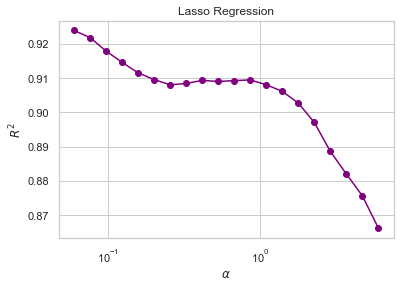

In [272]:
# lasso regression and K-fold cross validation and PolynomialFearures
pf = PolynomialFeatures(degree=3)
kf = KFold(shuffle=True, random_state=72018, n_splits=3)
scores = []
alphas = np.geomspace(0.06, 6.0, 20)
predictions_lsr = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])

    predictions_lsr = cross_val_predict(estimator, X_train, y_train, cv = kf)
    
    score = r2_score(y_train, predictions_lsr)
    
    scores.append(score)
plt.semilogx(alphas, scores, '-o', color='purple')
plt.title('Lasso Regression')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [273]:
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.03))])

best_estimator.fit(X_train, y_train)
lasso_score = best_estimator.score(X_train, y_train)

C:\Users\lucya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.316e+06, tolerance: 3.199e+04
  model = cd_fast.enet_coordinate_descent(


In [ ]:
### Improve Ridge score

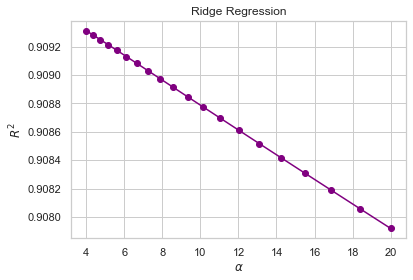

In [274]:
# ridge regression and K-fold cross validation and PolynamialFeatures
pf = PolynomialFeatures(degree=2)
alphas = np.geomspace(4, 20, 20)
scores=[]
predictions_rr = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)

    estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("ridge_regression", ridge)])

    predictions_rr = cross_val_predict(estimator, X_train, y_train, cv = kf)
    score = r2_score(y_train, predictions_rr)
    scores.append(score)

plt.plot(alphas, scores, '-o', color='purple')
plt.title('Ridge Regression')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [275]:
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("ridge_regression", Ridge(alpha=0.03))])

best_estimator.fit(X_train, y_train)
ridge_score = best_estimator.score(X_train, y_train)

In [276]:
# comparing accuracy scores of the models after tunning
pd.DataFrame([[linear_score, lasso_score, ridge_score]],columns=['linear', 'lasso', 'ridge'], index=['score'])

,linear,lasso,ridge
score,0.838789,0.91213,0.912645


In [277]:
def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

# Fit a basic linear regression model
linearRegression = LinearRegression().fit(X_train, y_train)
linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

# Fit a regular (non-cross validated) Ridge model
alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]
ridgeCV = RidgeCV(alphas=alphas, cv=4).fit(X_train, y_train)
ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))

# Fit a Lasso model using cross validation and determine the optimum value for 𝛼
alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])
lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=3).fit(X_train, y_train)
lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

# Fit elastic net with the same set of alphas as lasso
l1_ratios = np.linspace(0.1, 0.9, 9)
elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4).fit(X_train, y_train)
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))


rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Lasso', 'Ridge' 'ElasticNet']

# creating a pandas dataframe for comparing root-mean square errors
rmse_df = pd.DataFrame([[linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]],columns=['Linear', 'Lasso', 'Ridge', 'ElasticNet'], index=['rmse'])
rmse_df

,Linear,Lasso,Ridge,ElasticNet
rmse,82.808501,82.870802,82.808776,82.82913


[Text(0.5, 0, 'Actual'),
 Text(0, 0.5, 'Predicted'),
 Text(0.5, 1.0, 'Linear Regression Results')]

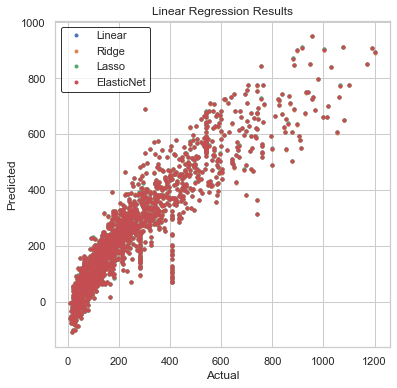

In [278]:
# plotting the results: prediction vs actual values

f = plt.figure(figsize=(6,6))
ax = plt.axes()

labels, models = ['Ridge', 'Lasso', 'ElasticNet'], [ ridgeCV, lassoCV, elasticNetCV]

for mod, label in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test), marker='o', ls='', ms=3.0, label=label, alpha=1)
    
leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual', ylabel='Predicted', title='Linear Regression Results')

### Hyperparameter tunning of the RandomForrestRegressor

### First try:

In [279]:
# Create a hyperparam grid for RandomForestClassifier
rfr_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [280]:
# Tune Ranndom Forest Regressor
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(2425)

# Setup random hyperparam search for RandomForestClassifier
rs_rfr = RandomizedSearchCV(RandomForestRegressor(),
                                param_distributions=rfr_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True,
                                n_jobs=-1)

# Fit random hyperparam search model for RandomForestClassifier
rs_rfr.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [281]:
#  Find the best hyperparams
rs_rfr.best_params_

{'n_estimators': 560,
 'min_samples_split': 4,
 'min_samples_leaf': 5,
 'max_depth': None}

In [282]:
# Evaluate the model
rs_rfr.score(X_test, y_test)

0.9288270663134561

### Second try:

In [286]:
# Create a hyperparam grid for RandomForestClassifier
param_grid = {
    "n_estimators":[100,200,300],
    "max_depth":[10, 50, 100],
    "max_features":[6,8,10,12,14,16]
}

rf2 = RandomForestRegressor()

rf_reg_tuned = GridSearchCV(estimator=rf2,
                            param_grid=param_grid,
                            cv=3,
                            n_jobs=-1,
                            verbose=2)

rf_reg_tuned.fit(X_train, y_train)
rf_reg_tuned.best_estimator_

Fitting 3 folds for each of 54 candidates, totalling 162 fits


C:\Users\lucya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
81 fits failed out of a total of 162.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
81 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lucya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lucya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 442, in fit
    trees = Parallel(
  File "C:\Users\lucya\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\lucya\anaconda3\lib\site-packages\j

RandomForestRegressor(max_depth=100, max_features=6, n_estimators=200)

In [287]:
rf_reg_tuned.score(X_test, y_test)

0.9382624359798177

## Conclusion
Two of the most toxicologically significant compounds are nitric oxide (NO) and nitrogen dioxide (NO2). Nitrogen Oxides (NOx) are among the most dangerous forms of air pollution. They are produced from the reaction of nitrogen and oxygen gases in the air during combustion, especially at high temperatures. In areas of high motor vehicle traffic, such as in large cities, the amount of nitrogen oxides emitted into the atmosphere as air pollution can be significant. It is mainly due to fossil fuel combustion from both stationary sources, i.e. power generation (21%), and mobile sources, i.e. transport (44%). Other atmospheric contributions come from non-combustion processes, for example nitric acid manufacture, welding processes and the use of explosives.

In addition, these create serious health issues. These mainly impact on respiratory conditions causing inflammation of the airways at high levels. Long term exposure can decrease lung function, increase the risk of respiratory conditions and increases the response to allergens. NOx also contributes to the formation of fine particles (PM) and ground level ozone, both of which are associated with adverse health effects.

In this project, the AirQuality dataset from UCI was used, for exploratory data analysis and the prediction of NOx. linear regression models (Linear baseline, ridge, lasso and elasticnet) were created and trained, using the same training and test splits, and then compared to find the best model among them.

Based on the models findings, the simple linear model gives the smallest Root-mean-square error. However, the difference in scores and errors are not significant and almost identical. Therefore it is recommended as a final model as it best fits the data in terms of accuracy.

The above models could give even better results if we used GridSearchCV or RandomizedSearchCV to optimize the models' hyperparameters. Alternatively, different techniques like Random Forest Regression or SUpport Vector Machine could be used.

Here, NOx levels were predicted, using the Air Quality dataset. However, there are many others ways to measure air pollution, including PM10 (particulate matter around between 2.5 and 10 microns in diameter), carbon monoxide, sulfur dioxide, nitrogen dioxide, ozone (O3), etc.